## K-Means Clustering for Customer Segmentation based on Mall data

In [124]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

In [125]:
df = pd.read_csv("segmentation data.csv")

In [126]:
df.head()

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,100000001,0,0,67,2,124670,1,2
1,100000002,1,1,22,1,150773,1,2
2,100000003,0,0,49,1,89210,0,0
3,100000004,0,0,45,1,171565,1,1
4,100000005,0,0,53,1,149031,1,1


### Data Cleaning for EDA

In [127]:
df.drop(['ID'],axis=1, inplace=True)

In [128]:
df.isnull().sum()

Sex                0
Marital status     0
Age                0
Education          0
Income             0
Occupation         0
Settlement size    0
dtype: int64

In [129]:
df['Sex'].map(lambda x: 'Male' if x == 0 else 'Female')

0         Male
1       Female
2         Male
3         Male
4         Male
         ...  
1995    Female
1996    Female
1997      Male
1998    Female
1999      Male
Name: Sex, Length: 2000, dtype: object

In [130]:
df['Sex'] = df['Sex'].map(lambda x: 'Male' if x == 0 else 'Female')

In [131]:
df['Marital status'] = df['Marital status'].map(lambda x: 'Single' if x == 0 else 'Non-single')

In [132]:
dict = {0 : 'Other/Unknown', 1 : 'High School', 2: 'University', 3 : 'Graduate School'}

In [133]:
df.replace({'Education' : dict}, inplace = True)

In [134]:
df['Occupation'] = df['Occupation'].map(lambda x: 'Unemployed' if x == 0 else ('Employed' if x == 1 else 'Manager or Self-Employed'))

In [135]:
df['Settlement size'] = df['Settlement size'].map(lambda x: 'Small City' if x==0 else ('Mid-Sized City' if x==1 else 'Big City'))

In [136]:
df.head()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,Male,Single,67,University,124670,Employed,Big City
1,Female,Non-single,22,High School,150773,Employed,Big City
2,Male,Single,49,High School,89210,Unemployed,Small City
3,Male,Single,45,High School,171565,Employed,Mid-Sized City
4,Male,Single,53,High School,149031,Employed,Mid-Sized City


## Exploratory Data Analysis (EDA)

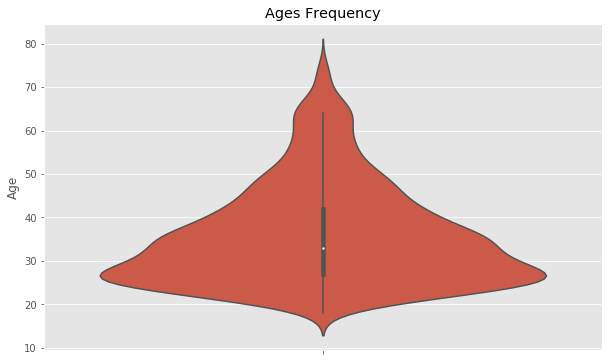

In [137]:
plt.figure(figsize=(10,6))
plt.title("Ages Frequency")
sns.violinplot(y=df['Age'])

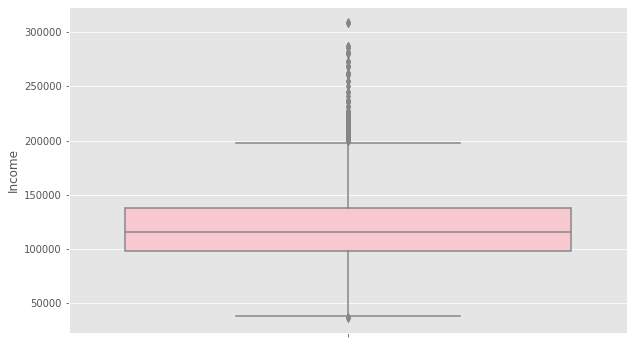

In [138]:
plt.figure(figsize=(10,6))
sns.boxplot(y=df['Income'], color='pink')

In [139]:
Sex = df['Sex'].value_counts()

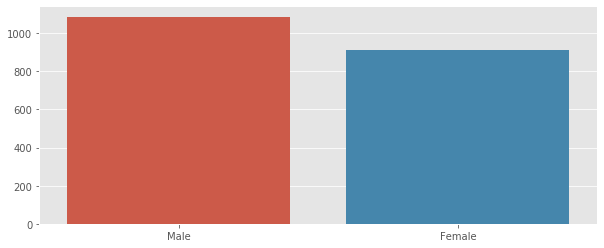

In [140]:
plt.figure(figsize=(10,4))
sns.barplot(x=Sex.index, y=Sex.values)

In [141]:
Marital_status = df['Marital status'].value_counts()
Education = df['Education'].value_counts()
Occupation = df['Occupation'].value_counts()
Settlement_size = df['Settlement size'].value_counts()

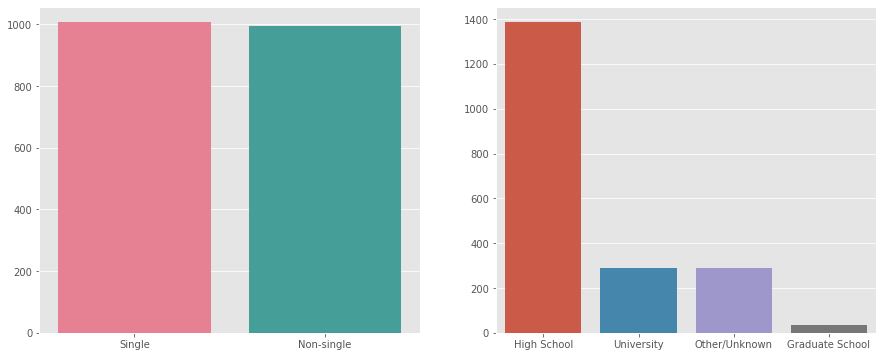

In [142]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.barplot(x=Marital_status.index, y=Marital_status.values, palette='husl')
plt.subplot(1,2,2)
sns.barplot(x=Education.index, y=Education.values)

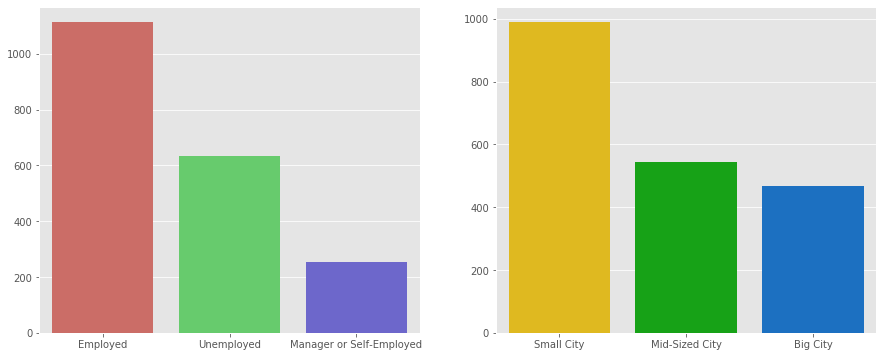

In [143]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.barplot(x=Occupation.index, y=Occupation.values, palette='hls')
plt.subplot(1,2,2)
sns.barplot(x=Settlement_size.index, y=Settlement_size.values, palette='nipy_spectral_r')

## K-Means Clustering

Compute K-Means clustering for different values of K by varying K from 1 to 10 clusters.
For each K, calculate the total within-cluster sum of square (WCSS)

In [144]:
from sklearn.cluster import KMeans
wcss = []

In [145]:
for k in range(1,11):
    kmeans = KMeans(n_clusters=k, init="k-means++")
    kmeans.fit(df[['Age', 'Income']])
    wcss.append(kmeans.inertia_)

Plot the curve of WCSS vs the number of clusters K.

Text(0, 0.5, 'WCSS')

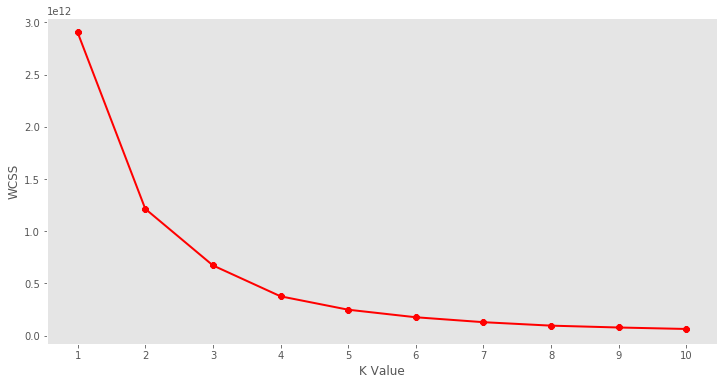

In [146]:
plt.figure(figsize=(12,6))    
plt.grid()
plt.plot(range(1,11),wcss, linewidth=2, color="red", marker ="8")
plt.xlabel("K Value")
plt.xticks(np.arange(1,11,1))
plt.ylabel("WCSS")

According to the Elbow method, the location of a bend (knee) in the plot is generally considered as an indicator of the appropriate number of clusters.
We identify the bend at K=4 in the graph above,  which means that the appropriate number of clusters is 4.

In [147]:
# Now we cluster

In [148]:
km = KMeans(n_clusters=4)
clusters = km.fit_predict(df[['Age', 'Income']])
df["label"] = clusters

Text(0, 0.5, 'Annual Income')

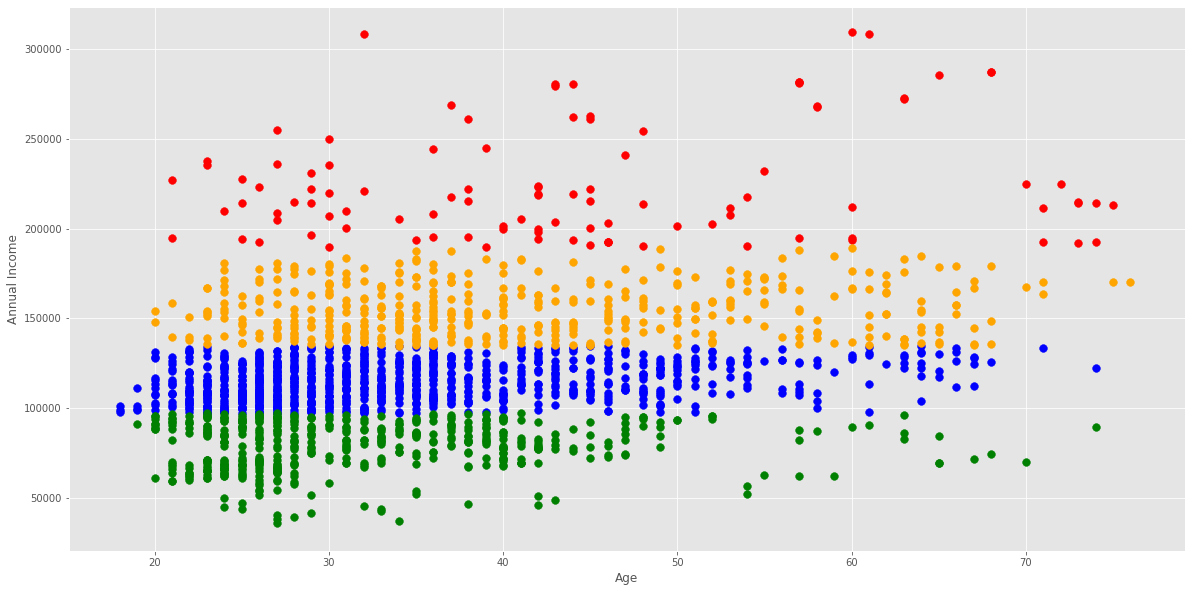

In [149]:
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot()
ax.scatter(df.Age[df.label == 0], df["Income"][df.label == 0], c='blue', s=60)
ax.scatter(df.Age[df.label == 1], df["Income"][df.label == 1], c='red', s=60)
ax.scatter(df.Age[df.label == 2], df["Income"][df.label == 2], c='green', s=60)
ax.scatter(df.Age[df.label == 3], df["Income"][df.label == 3], c='orange', s=60)
plt.xlabel("Age")
plt.ylabel("Annual Income")

It seems that the K-Means clustering method has segmented the customers almost entirely based on income classes and not age, since the lines between the clusters are horizontal, thus unchanging with regards to age.